# KPI 1: Utilisation rate

* monthly
* daily
* hourly

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white", context="talk")



from datetime import datetime
from datetime import timedelta
import math
import random
import timeit

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




## Data Readin:

In [86]:
def read_data(city_name):
    trip_data = pd.read_csv("Project_Data/Combined_Data/"+city_name+".csv", encoding = "ISO-8859-1")
    trip_data["trip_duration"] = pd.to_timedelta(trip_data["trip_duration"])
    trip_data["datetime_start"] = pd.to_datetime(trip_data["datetime_start"])
    trip_data["datetime_end"] = pd.to_datetime(trip_data["datetime_end"])
    return trip_data



### Data Plotting def:

In [94]:
def get_timeperiod(mode):
    return mode["day"].nunique()
    
    



def set_utilization(df, timereolution):
    timeperiod = get_timeperiod(df)
    bike_usage = df.groupby([timereolution], as_index= True )["b_number"].count().reset_index()
    sum_bike_usage = sum(bike_usage['b_number'])
    bike_usage['utilization']=bike_usage['b_number'].apply(lambda x: x / sum_bike_usage * 100)    
    return bike_usage




    


def general_utilization(city_name,lable,provider,dataset):
    mode = read_data(city_name)



    # differnt temporal_resolutions
    df_hour = set_utilization (mode, "hour")
    df_weekday = set_utilization (mode, "weekday")
    df_month = set_utilization (mode, "month")
    
    # plots
    fig1, (ax1) = plt.subplots(1, 1, figsize=(15,5))
    fig2, (ax2, ax3) = plt.subplots(1, 2, figsize=(15,5))

    sns.barplot(x="hour", y="utilization", data=df_hour, palette="rocket", ax=ax1)
    sns.barplot(x="weekday", y="utilization", data=df_weekday, palette="rocket", ax=ax2)
    sns.barplot(x="month", y="utilization", data=df_month, palette="rocket", ax=ax3) 
    
    # add mean utilization line to plot
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    ax1.axhline(y = df_hour['utilization'].mean(), color='red', linewidth=2, alpha=.7)
    ax1.set(xlabel='Hours', ylabel="Average "+lable+" utilization")
    ax1.set_title(provider+": Average "+lable+" utilization per hour")

    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    ax2.axhline(y = df_weekday['utilization'].mean(), color='red', linewidth=2, alpha=.7)
    ax2.set(xlabel='Weekdays', ylabel="Average "+lable+" utilization")
    ax2.set_title(provider+": Average "+lable+" utilization per weekday")

    ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")
    ax3.axhline(y = df_month['utilization'].mean(), color='red', linewidth=2, alpha=.7)
    ax3.set(xlabel='Month', ylabel="Average "+lable+" utilization")
    ax3.set_title(provider+": Average "+lable+" utilization per month" ) 
    
    
#    fig1.savefig("Test_Pictures/general_utilization_hour_"+provider+"_"+lable+"_"+dataset+".pdf")
#    fig2.savefig("Test_Pictures/general_utilization_month&weekday_"+provider+"_"+lable+"_"+dataset+".pdf")

    fig1.tight_layout()
    fig2.tight_layout()
    return 

## Regression def:

In [95]:
def weather_utilization (data):
    plot_weather_daily_average(data, "wind")
    plot_weather_daily_average(data, "rain")
    plot_weather_daily_average(data, "temp")
    plot_weather_hourly(data, "wind")
    plot_weather_hourly(data, "rain")
    plot_weather_hourly(data, "temp")
    
def plot_weather_hourly (data,condition):
    weather_hourly = pd.DataFrame()
    weather_hourly[condition] = data.groupby("rounded_time_hourly")[condition].mean()
    weather_hourly["number_ids"]= data.groupby("rounded_time_hourly")["b_number"].count()
    xp = weather_hourly[condition].values.reshape((-1,1)) 
    yp = weather_hourly["number_ids"]
    fig, ax = plt.subplots(figsize = (8,6))
    # Plotting the data
    ax.scatter(xp, yp, marker='x',)
    ax.set_xlabel("Hourly " + condition)
    ax.set_ylabel("Demand ")
    plt.show()    
    
def plot_weather_daily_average (data,condition):
    xp = data.groupby("day")[condition].mean()
    yp = data.groupby("day")["b_number"].count()
    fig, ax = plt.subplots(figsize = (8,6))
    # Plotting the data
    ax.scatter(xp, yp, marker='x',)
    ax.set_xlabel("Average daily " + condition)
    ax.set_ylabel("Demand ")
    plt.show()



In [96]:
def weather_utilization_regression (data):
    plot_weather_daily_average_regression(data, "wind")
    plot_weather_daily_average_regression(data, "rain")
    plot_weather_daily_average_regression(data, "temp")
    plot_weather_hourly_regression(data, "wind")
    plot_weather_hourly_regression(data, "rain")
    plot_weather_hourly_regression(data, "temp")
    
def plot_weather_hourly_regression (data,condition):
    weather_hourly = pd.DataFrame()
    weather_hourly[condition] = data.groupby("rounded_time_hourly")[condition].mean()
    weather_hourly["number_ids"]= data.groupby("rounded_time_hourly")["b_number"].count()
    X = weather_hourly[condition].values.reshape((-1,1)) 
    y = weather_hourly["number_ids"]
    # initialize model
    lin_mod = LinearRegression()

#train model
    lin_mod.fit(X, y)

#make predictions using model
    model_pred = lin_mod.predict(X)

# plot results
    plt.figure(figsize = (8,6))
    plt.scatter(X, y, marker="x")
    plt.xlabel(condition+" hourly")
    plt.ylabel("Demand hourly")
    plt.plot(X, model_pred, c='C2')
    plt.legend(['Squared loss fit','Observed days'])
    print(lin_mod.coef_, lin_mod.intercept_)

def plot_weather_daily_average_regression (data,condition):
    weather_hourly = pd.DataFrame()
    weather_hourly[condition] = data.groupby("day")[condition].mean()
    weather_hourly["number_ids"]= data.groupby("day")["b_number"].count()
    X = weather_hourly[condition].values.reshape((-1,1)) 
    y = weather_hourly["number_ids"]
       # initialize model
    lin_mod = LinearRegression()

#train model
    lin_mod.fit(X, y)

#make predictions using model
    model_pred = lin_mod.predict(X)

# plot results
    plt.figure(figsize = (8,6))
    plt.scatter(X, y, marker="x")
    plt.xlabel("mean daily "+condition)
    plt.ylabel("average daily deamand")
    plt.plot(X, model_pred, c='C2')
    plt.legend(['Squared loss fit','Observed days'])
    print(lin_mod.coef_, lin_mod.intercept_)

# Utilization rate plots Duesseldorf:

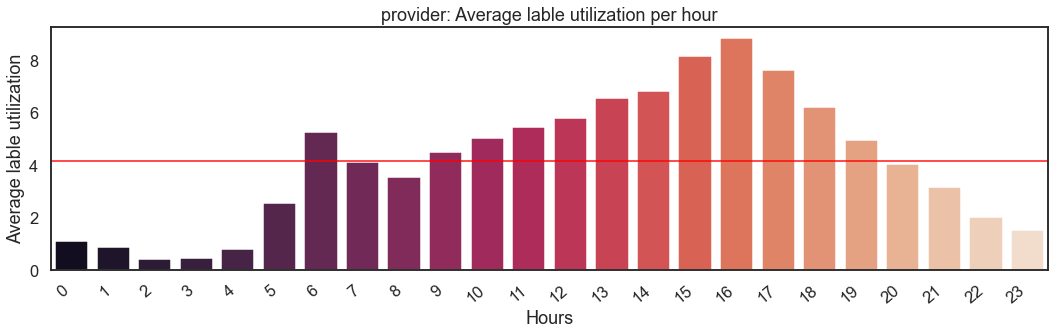

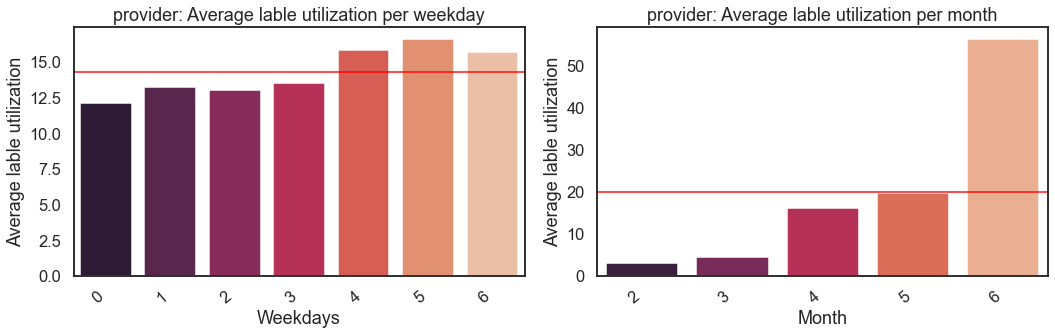

In [99]:
general_utilization("duesseldorf","lable","provider","dataset")


[-14.34234539] 186.49328789555554
[-168.73356474] 129.1854989058963
[16.74623706] -105.02106289844586
[0.04106496] 7.2342866843144344
[-1.15958725] 7.45660479120085
[0.85746395] -4.574634195945084


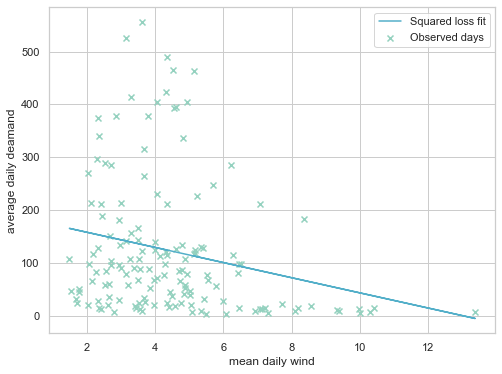

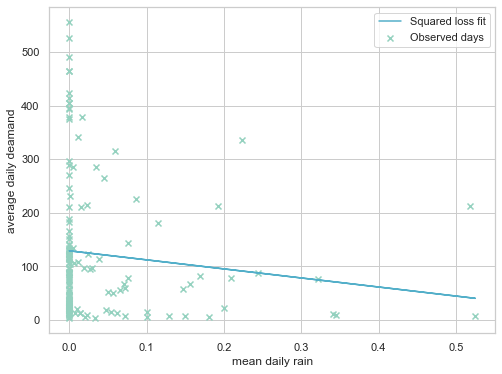

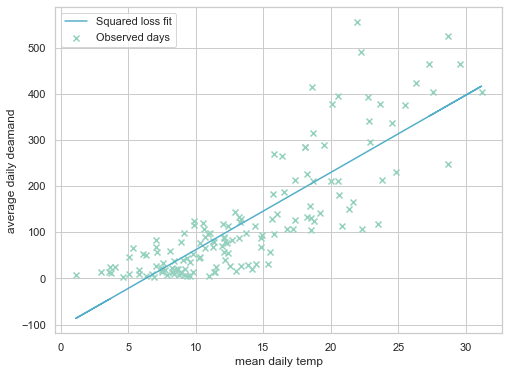

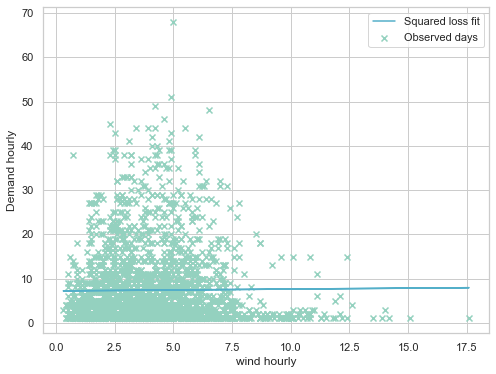

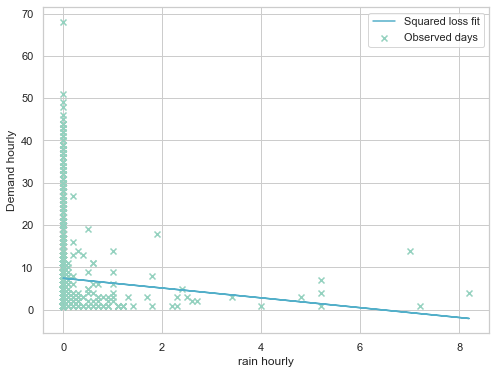

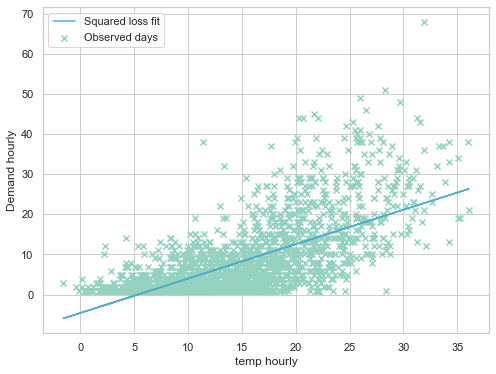

In [91]:
weather_utilization_regression(read_data("duesseldorf"))

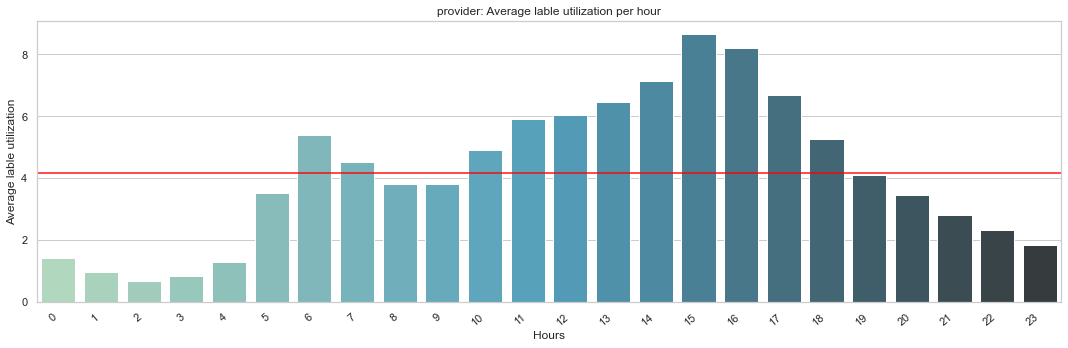

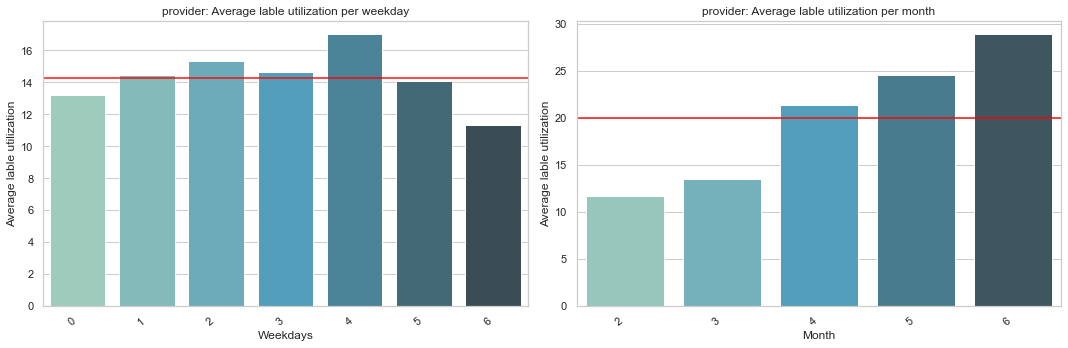

In [92]:
general_utilization("bremen","lable","provider","dataset")

[-20.68187295] 492.2698325945259
[-381.20240355] 409.43058741517575
[18.26121126] 168.49777701415158
[0.64963572] 14.387423654858587
[-3.23700736] 17.403323099404698
[1.1157898] 4.760487299524614


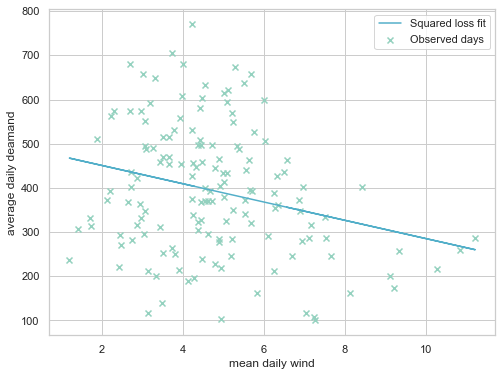

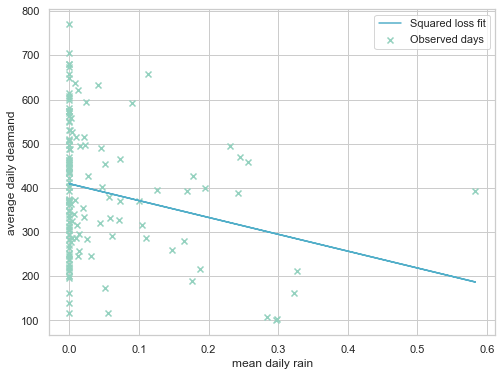

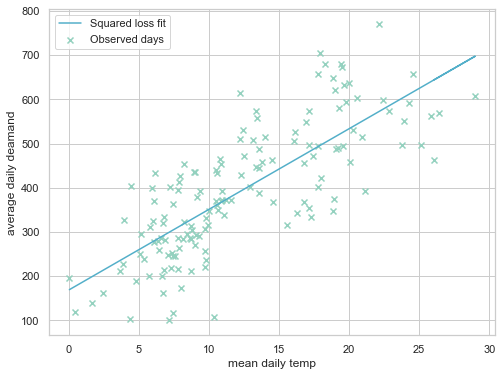

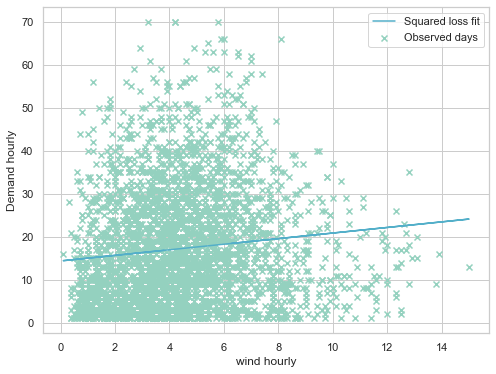

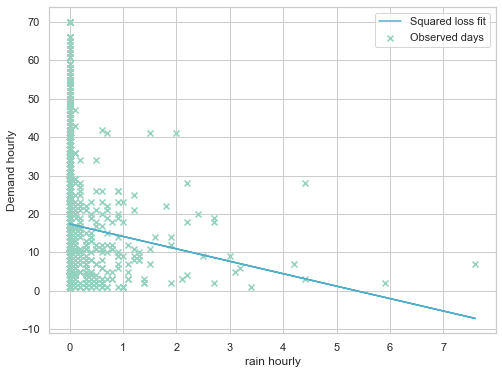

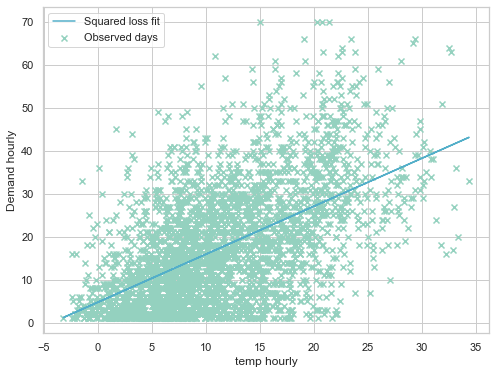

In [93]:
weather_utilization_regression(read_data("bremen"))